In [143]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import time
import numpy as np
import matplotlib.patches as mpatches

In [2]:
#set file paths and read in files
filepath = '../raw_data/MN_walkability.csv'
statepath = '../raw_data/state_and_county_fips_master.csv'
healthpath = '../raw_data/MN_health_data.csv'
minnesota = pd.read_csv(filepath)
states = pd.read_csv(statepath)
health = pd.read_csv(healthpath)
health.head()

,fips,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Z-Score,YPLL Rate (AIAN),...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (white),% Drive Alone (white) 95% CI - Low,% Drive Alone (white) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.19,95% CI - High.19,Z-Score.34
0,27000,Minnesota,NaN,NaN,55372.0,5586.0,5515.0,5657.0,NaN,21423.0,...,66.0,68.0,78.0,78.0,78.0,2903106,31,31,32,NaN
1,27001,Minnesota,Aitkin,NaN,277.0,7625.0,5759.0,9490.0,0.75,NaN,...,NaN,NaN,NaN,NaN,NaN,6248,34,31,37,0.54
2,27003,Minnesota,Anoka,NaN,3321.0,5460.0,5178.0,5742.0,-0.47,14440.0,...,60.0,77.0,79.0,78.0,80.0,188439,43,41,44,1.39
3,27005,Minnesota,Becker,NaN,494.0,7566.0,6472.0,8659.0,0.72,21914.0,...,NaN,NaN,79.0,76.0,81.0,16095,25,23,26,-0.33
4,27007,Minnesota,Beltrami,NaN,627.0,10589.0,9461.0,11716.0,2.42,26004.0,...,53.0,85.0,78.0,75.0,80.0,21098,19,17,22,-0.85


In [3]:
#add leading 0's for counties
minnesota['COUNTYFP'] = minnesota['COUNTYFP'].astype(str)
minnesota['STATEFP'] = minnesota['STATEFP'].astype(str)
minnesota['COUNTYFP'] = minnesota['COUNTYFP'].str.zfill(3)

#concatenate state and county codes
minnesota['fips'] = minnesota['STATEFP'] + minnesota['COUNTYFP']
minnesota['fips'] = minnesota['fips'].astype('int64')
minnesota.head(10)

,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,fips
0,125050,125051,2.716310e+11,2.716310e+11,27,163,71003,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,18,15,8,1,8.500000,12371.721880,4.274573e+06,27163
1,125051,125052,2.716310e+11,2.716310e+11,27,163,71003,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,18,16,7,1,8.333333,7746.443532,2.872370e+06,27163
2,125052,125053,2.716310e+11,2.716310e+11,27,163,71003,3,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,15,6,9,1,6.833333,9884.396703,2.854760e+06,27163
3,125053,125054,2.716310e+11,2.716310e+11,27,163,71006,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,20,20,1,13.666667,7814.948545,3.005446e+06,27163
4,125054,125055,2.716310e+11,2.716310e+11,27,163,71006,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,18,18,1,12.666667,10906.431880,3.546875e+06,27163
5,125055,125056,2.713110e+11,2.713110e+11,27,131,70800,5,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,11,5,16,1,8.333333,3945.373100,4.936691e+05,27131
6,125056,125057,2.714500e+11,2.714500e+11,27,145,601,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,15,20,18,1,12.166667,3645.290542,5.845590e+05,27145
7,125057,125058,2.703710e+11,2.703710e+11,27,037,60904,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,20,12,1,11.000000,7146.198431,2.405088e+06,27037
8,125058,125059,2.703710e+11,2.703710e+11,27,037,60604,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,7,18,10,1,7.833333,7165.978041,2.552602e+06,27037
9,125059,125060,2.703710e+11,2.703710e+11,27,037,60817,4,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,4,11,12,1,6.833333,8984.860085,4.239370e+06,27037


In [4]:
#merge main dataset with fips codes dataset
merged_df = pd.merge(minnesota,states,on='fips')

#Choose with columns you want to view (feel free to add more!)
reduced_columns = merged_df[['GEOID20','CSA_Name','name','state','TotPop','NatWalkInd','fips']]
reduced_columns.head(20)

,GEOID20,CSA_Name,name,state,TotPop,NatWalkInd,fips
0,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1934,8.500000,27163
1,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,574,8.333333,27163
2,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,998,6.833333,27163
3,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2506,13.666667,27163
4,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2350,12.666667,27163
5,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,953,9.500000,27163
6,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,860,5.166667,27163
7,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1918,5.333333,27163
8,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1470,12.666667,27163
9,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1016,10.500000,27163


In [5]:
remove_county = reduced_columns[reduced_columns['name'].str.contains("", na = False)].copy()

remove_county['name'] = remove_county['name'].str.replace(' County', '')

remove_county.head(20)

,GEOID20,CSA_Name,name,state,TotPop,NatWalkInd,fips
0,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1934,8.500000,27163
1,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,574,8.333333,27163
2,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,998,6.833333,27163
3,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,2506,13.666667,27163
4,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,2350,12.666667,27163
5,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,953,9.500000,27163
6,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,860,5.166667,27163
7,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1918,5.333333,27163
8,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1470,12.666667,27163
9,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1016,10.500000,27163


In [6]:
#add buckets for walkability
for index,row in remove_county.iterrows():
    if remove_county.loc[index, "NatWalkInd"] <= 5.75:
        remove_county.loc[index,'Walkability_bucket'] = 'Least Walkable'
    elif remove_county.loc[index, "NatWalkInd"] <= 10.5:
        remove_county.loc[index,'Walkability_bucket'] ='Below Average Walkability'
    elif remove_county.loc[index, "NatWalkInd"] <= 15.25:
        remove_county.loc[index,'Walkability_bucket'] = 'Above Average Walkability'
    elif remove_county.loc[index, "NatWalkInd"] > 15.25:
        remove_county.loc[index,'Walkability_bucket'] = 'Most Walkable'
remove_county.head(20)  

,GEOID20,CSA_Name,name,state,TotPop,NatWalkInd,fips,Walkability_bucket
0,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1934,8.500000,27163,Below Average Walkability
1,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,574,8.333333,27163,Below Average Walkability
2,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,998,6.833333,27163,Below Average Walkability
3,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,2506,13.666667,27163,Above Average Walkability
4,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,2350,12.666667,27163,Above Average Walkability
5,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,953,9.500000,27163,Below Average Walkability
6,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,860,5.166667,27163,Least Walkable
7,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1918,5.333333,27163,Least Walkable
8,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1470,12.666667,27163,Above Average Walkability
9,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1016,10.500000,27163,Below Average Walkability


In [7]:
sums = remove_county.groupby(['name']).sum()['TotPop']
County_sums = pd.DataFrame({'County Population':sums})
weighted_data = pd.merge(remove_county,County_sums,on='name')

weighted_data['weights'] = weighted_data['TotPop'] / weighted_data['County Population']

weighted_data['weightsum'] = weighted_data['NatWalkInd'] * weighted_data['weights']
weighted_data.head()

weighted_index = pd.DataFrame({'Weighted Walk Index':weighted_data.groupby(['name']).sum()['weightsum']})

#weighted_index_sorted = weighted_index.sort_values('Weighted Walk Index',ascending=False)
#weighted_index_sorted.head()

In [21]:
weighted_index_sorted = weighted_index.sort_values('Weighted Walk Index',ascending=False)
weighted_index_sorted

,Weighted Walk Index
name,
Ramsey,12.959863
Hennepin,12.202175
Clay,10.431105
Dakota,9.804645
St. Louis,9.133652
...,...
Lake of the Woods,4.956857
Todd,4.929160
Mahnomen,4.867054


In [9]:
weighted_index_sorted.tail()

,Weighted Walk Index
name,
Lake of the Woods,4.956857
Todd,4.929160
Mahnomen,4.867054
Kanabec,4.619637
Clearwater,4.527576


In [10]:
df1 = pd.DataFrame(weighted_index_sorted.head())
df2 = pd.DataFrame(weighted_index_sorted.tail())

frames = [df1, df2]

result = pd.concat(frames)

In [11]:
result

,Weighted Walk Index
name,
Ramsey,12.959863
Hennepin,12.202175
Clay,10.431105
Dakota,9.804645
St. Louis,9.133652
Lake of the Woods,4.956857
Todd,4.929160
Mahnomen,4.867054
Kanabec,4.619637


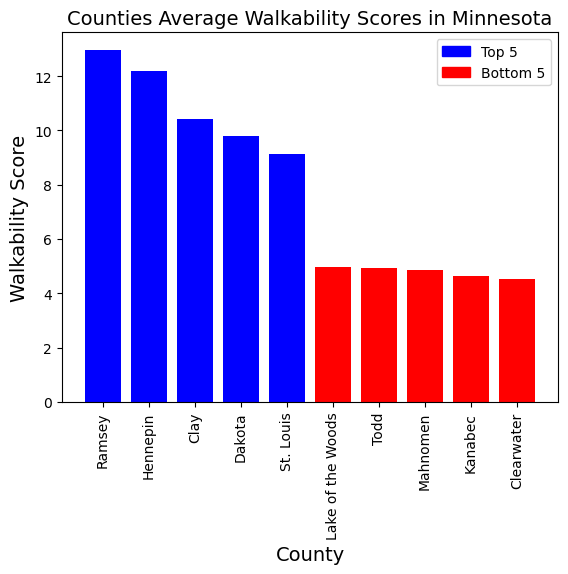

In [147]:
#x_axis = np.arange(len(rain_df))

colors = ['blue','blue','blue','blue','blue','red','red','red','red','red',]
plt.bar(result.index, result['Weighted Walk Index'], color=colors)
plt.title('Counties Average Walkability Scores in Minnesota', fontsize=14)
plt.xlabel('County', fontsize=14)
plt.ylabel('Walkability Score', fontsize=14)
plt.xticks(rotation=90)
blue_patch = mpatches.Patch(color='blue', label='Top 5')
red_patch = mpatches.Patch(color='red', label='Bottom 5')


plt.legend(handles=[blue_patch,red_patch])
plt.show()

In [103]:
second_pie = remove_county
second_pie

,GEOID20,CSA_Name,name,state,TotPop,NatWalkInd,fips,Walkability_bucket
0,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,1934,8.500000,27163,Below Average Walkability
1,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,574,8.333333,27163,Below Average Walkability
2,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,998,6.833333,27163,Below Average Walkability
3,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,2506,13.666667,27163,Above Average Walkability
4,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington,MN,2350,12.666667,27163,Above Average Walkability
...,...,...,...,...,...,...,...,...
4106,2.704000e+11,"Rochester-Austin, MN",Dodge,MN,1785,15.166667,27039,Above Average Walkability
4107,2.704000e+11,"Rochester-Austin, MN",Dodge,MN,1294,13.000000,27039,Above Average Walkability
4108,2.704000e+11,"Rochester-Austin, MN",Dodge,MN,1757,15.833333,27039,Most Walkable
4109,2.704000e+11,"Rochester-Austin, MN",Dodge,MN,974,7.500000,27039,Below Average Walkability


In [112]:
third_pie = second_pie[["name","Walkability_bucket"]] 
third_pie

,name,Walkability_bucket
0,Washington,Below Average Walkability
1,Washington,Below Average Walkability
2,Washington,Below Average Walkability
3,Washington,Above Average Walkability
4,Washington,Above Average Walkability
...,...,...
4106,Dodge,Above Average Walkability
4107,Dodge,Above Average Walkability
4108,Dodge,Most Walkable
4109,Dodge,Below Average Walkability


In [121]:
fourth_pie = third_pie.groupby(['Walkability_bucket'])['Walkability_bucket'].count()
fourth_pie

Walkability_bucket
Above Average Walkability    1181
Below Average Walkability    1451
Least Walkable               1088
Most Walkable                 391
Name: Walkability_bucket, dtype: int64

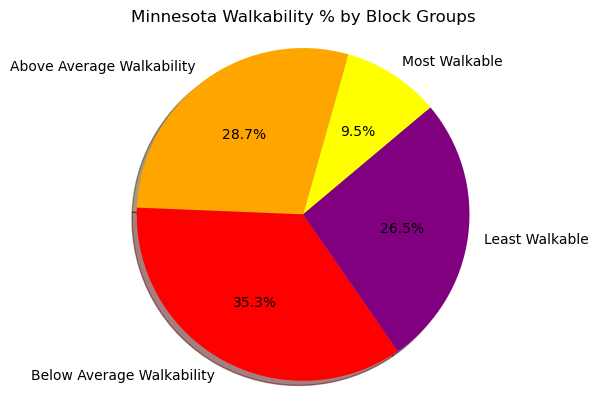

In [136]:
# Tell matplotlib to create a pie chart based upon the above data
walkability = ["Most Walkable", "Above Average Walkability", "Below Average Walkability", "Least Walkable"]
weightsum = [391, 1181, 1451,1088]
explode = (0.0,0,0,0)
colors = ["yellow", "orange", "red", "purple"]

plt.pie(weightsum, explode=explode, labels=walkability, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Minnesota Walkability % by Block Groups")
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()